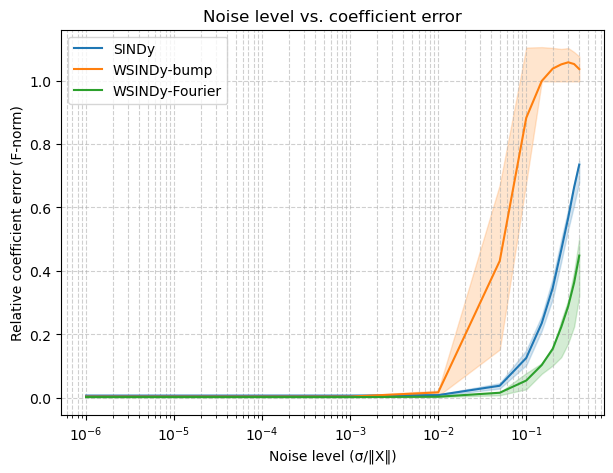

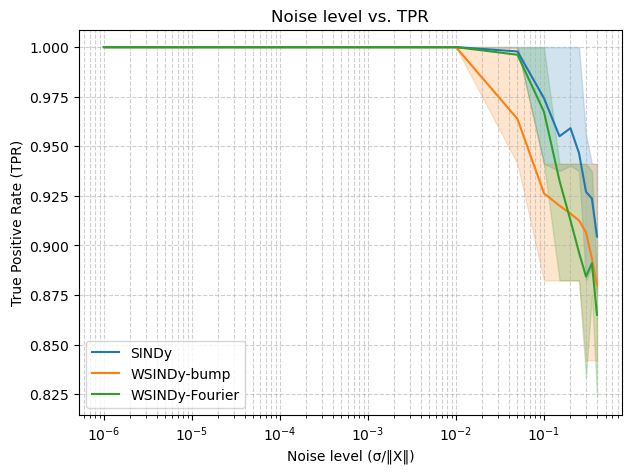

In [4]:
from SINDyFunctions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# ---加载数据---
data = loadmat("ResultsLog/results_noiseLevelAndCoeffs_VDP.mat")

arr_sig_NR = data["arr_sig_NR"].flatten()
arr_w_SINDy = data["arr_w_SINDy"]
arr_w_bump  = data["arr_w_bumpWSINDy"]
arr_w_fft   = data["arr_w_FFTWSINDy"]

# true 系数矩阵（和你之前代码保持一致）
mu = 10
w_true = np.zeros((10,2))
w_true[2,0] = 1
w_true[1,1] = -1
w_true[2,1] = mu
w_true[8,1] = -mu

# ---统计结果---
res_SINDy = batchErrorEval(w_true, arr_w_SINDy)
res_bump  = batchErrorEval(w_true, arr_w_bump)
res_fft   = batchErrorEval(w_true, arr_w_fft)

# ---画图函数---
def plot_with_quartiles(x, mean, q1, q3, label, color):
    plt.plot(x, mean, label=label, color=color)
    plt.fill_between(x, q1, q3, color=color, alpha=0.2)

# ---图1: Noise level vs. coefficient error---
plt.figure(figsize=(7,5))
plot_with_quartiles(arr_sig_NR, res_SINDy["error_mean"], res_SINDy["error_q1"], res_SINDy["error_q3"], "SINDy", "C0")
plot_with_quartiles(arr_sig_NR, res_bump["error_mean"],  res_bump["error_q1"],  res_bump["error_q3"],  "WSINDy-bump", "C1")
plot_with_quartiles(arr_sig_NR, res_fft["error_mean"],   res_fft["error_q1"],   res_fft["error_q3"],   "WSINDy-Fourier", "C2")
plt.xscale("log")  # 因为 noise level 是 log spaced
plt.xlabel("Noise level (σ/‖X‖)")
plt.ylabel("Relative coefficient error (F-norm)")
plt.legend()
plt.title("Noise level vs. coefficient error")
plt.grid(True, which="both", ls="--", alpha=0.6)

# ---图2: Noise level vs. TPR---
plt.figure(figsize=(7,5))
plot_with_quartiles(arr_sig_NR, res_SINDy["TPR_mean"], res_SINDy["TPR_q1"], res_SINDy["TPR_q3"], "SINDy", "C0")
plot_with_quartiles(arr_sig_NR, res_bump["TPR_mean"],  res_bump["TPR_q1"],  res_bump["TPR_q3"],  "WSINDy-bump", "C1")
plot_with_quartiles(arr_sig_NR, res_fft["TPR_mean"],   res_fft["TPR_q1"],   res_fft["TPR_q3"],   "WSINDy-Fourier", "C2")
plt.xscale("log")
plt.xlabel("Noise level (σ/‖X‖)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.title("Noise level vs. TPR")
plt.grid(True, which="both", ls="--", alpha=0.6)

plt.show()